In [111]:
import numpy as np
import matplotlib.cm as cm
import cv2

In [112]:
import math as m


def getRotationMatrixY(theta):
    return np.matrix(
        [[m.cos(theta), 0, m.sin(theta), 0],
        [0, 1, 0, 0],
        [-m.sin(theta), 0, m.cos(theta), 0],
        [0, 0, 0, 1]]
    )


In [113]:
def rotateImageAroundYByDegrees(inputImage, degreesToRotate):
    # print(getRotationMatrixY(degreesToRotate).shape)
    return inputImage @ getRotationMatrixY(degreesToRotate)


In [114]:
import math as m

# https://stackoverflow.com/questions/49097667/how-can-i-rotate-a-3d-array-nxnxn-by-x-degrees-around-x-y-and-z-axes
def rotateMatrix(inputMatrix, deg_angle, axis):
    d = len(inputMatrix)
    h = len(inputMatrix[0])
    w = len(inputMatrix[0][0])
    min_new_x = 0
    max_new_x = 0
    min_new_y = 0
    max_new_y = 0
    min_new_z = 0
    max_new_z = 0
    new_coords = []
    angle = m.radians(deg_angle)

    for z in range(d):
        for y in range(h):
            for x in range(w):

                new_x = None
                new_y = None
                new_z = None

                if axis == "x":
                    new_x = int(round(x))
                    new_y = int(round(y * m.cos(angle) - z * m.sin(angle)))
                    new_z = int(round(y * m.sin(angle) + z * m.cos(angle)))
                elif axis == "y":
                    new_x = int(round(z * m.sin(angle) + x * m.cos(angle)))
                    new_y = int(round(y))
                    new_z = int(round(z * m.cos(angle) - x * m.sin(angle)))
                elif axis == "z":
                    new_x = int(round(x * m.cos(angle) - y * m.sin(angle)))
                    new_y = int(round(x * m.sin(angle) + y * m.cos(angle)))
                    new_z = int(round(z))

                val = inputMatrix.item((z, y, x))
                new_coords.append((val, new_x, new_y, new_z))
                if new_x < min_new_x:
                    min_new_x = new_x
                if new_x > max_new_x:
                    max_new_x = new_x
                if new_y < min_new_y:
                    min_new_y = new_y
                if new_y > max_new_y:
                    max_new_y = new_y
                if new_z < min_new_z:
                    min_new_z = new_z
                if new_z > max_new_z:
                    max_new_z = new_z

    new_x_offset = abs(min_new_x)
    new_y_offset = abs(min_new_y)
    new_z_offset = abs(min_new_z)

    new_width = abs(min_new_x - max_new_x)
    new_height = abs(min_new_y - max_new_y)
    new_depth = abs(min_new_z - max_new_z)

    rotated = np.empty((new_depth + 1, new_height + 1, new_width + 1))
    rotated.fill(0)
    for coord in new_coords:
        val = coord[0]
        x = coord[1]
        y = coord[2]
        z = coord[3]

        if rotated[new_z_offset + z][new_y_offset + y][new_x_offset + x] == 0:
            rotated[new_z_offset + z][new_y_offset + y][new_x_offset + x] = val

    return rotated


In [115]:
def mip(np_img):
    return np.max(np_img, axis=0)

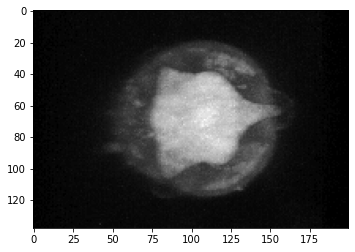

In [116]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

image_path = "Artemisia_pollen_145x138x138_8bit.raw"
image = np.fromfile(image_path, dtype="uint8", sep="").reshape((145, 138, 138))

rotatedImage = mip(rotateMatrix(image, 45, "y"))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
plt.imshow(rotatedImage, cmap=cm.gray)


In [117]:
image_path = "Artemisia_pollen_145x138x138_8bit.raw"
image = np.fromfile(image_path, dtype="uint8", sep="").reshape((145, 138, 138))
targetFolder = "output_pollen_rotation"

for rotationAngle in range(0, 355, 5):
    rotatedImage = rotateMatrix(image, rotationAngle, "y")
    cv2.imwrite(
        targetFolder + "/movie_frame{}.pgm".format(str(rotationAngle).zfill(3)),
        mip(rotatedImage),
    )
